## Get Data 


In [1]:
# if missing - install the missing packages


# imports
import pandas as pd
# from google.colab import files
import io
import numpy as np

#url = "https://people.sc.fsu.edu/~jburkardt/data/csv/cities.csv"
#url ="https://people.sc.fsu.edu/~jburkardt/data/csv/nile.csv"
url = "https://people.sc.fsu.edu/~jburkardt/data/csv/letter_frequency.csv"
# url = input("URL of the csv: ")"


table_1  = pd.read_csv(url)

# years = table_1["Year"].to_nummpy() # nile url only
table_1.head()
#table_1.describe()

,Letter,"""Frequency""","""Percentage"""
0,"""A""",24373121,8.1
1,"""B""",4762938,1.6
2,"""C""",8982417,3.0
3,"""D""",10805580,3.6
4,"""E""",37907119,12.6


### From a table on a webpage

In [2]:
#!pip install lxml
import pandas as pd
import numpy as np

#URL = "https://en.wikipedia.org/wiki/Philadelphia_Phillies"
URL = "https://en.wikipedia.org/wiki/Cricket_World_Cup"

tables = pd.read_html(URL) 
print(f"There are {len(tables)} Tables")
table_2 = tables[3]
table_2

There are 25 Tables


Summary of tournament formats        \
                               #  Year   
0                              1  1975   
1                              2  1979   
2                              3  1983   
3                              4  1987   
4                              5  1992   
5                              6  1996   
6                              7  1999   
7                              8  2003   
8                              9  2007   
9                             10  2011   
10                            11  2015   
11                            12  2019   
12                            13  2023   
13                            14  2027   
14                            15  2031   

                                                                  \
                                           Host(s) Teams Matches   
0                                          England     8      15   
1                                          England     8      15   
2                                   England  Wales     8      27   
3                                  India  Pakistan     8      27   
4                           Australia  New Zealand     9      39   
5                       India  Pakistan  Sri Lanka    12      37   
6   England  Ireland  Netherlands  Scotland  Wales    12      42   
7                    South Africa  Kenya  Zimbabwe    14      54   
8                                      West Indies    16      51   
9                     India  Bangladesh  Sri Lanka    14      49   
10                          Australia  New Zealand    14      49   
11                                  England  Wales    10      48   
12                                           India    10      48   
13                 South Africa  Namibia  Zimbabwe    14      54   
14                               India  Bangladesh    14      54   

                                     \
                  Preliminary stage   
0   2 groups of 4 teams: 12 matches   
1   2 groups of 4 teams: 12 matches   
2   2 groups of 4 teams: 24 matches   
3   2 groups of 4 teams: 24 matches   
4    1 group of 9 teams: 36 matches   
5   2 groups of 6 teams: 30 matches   
6   2 groups of 6 teams: 30 matches   
7   2 groups of 7 teams: 42 matches   
8   4 groups of 4 teams: 24 matches   
9   2 groups of 7 teams: 42 matches   
10  2 groups of 7 teams: 42 matches   
11  1 group of 10 teams: 45 matches   
12  1 group of 10 teams: 45 matches   
13  2 groups of 7 teams: 42 matches   
14  2 groups of 7 teams: 42 matches   

                                                       
                                          Final stage  
0   Knock-out of 4 teams (group winners and runner...  
1   Knock-out of 4 teams (group winners and runner...  
2   Knock-out of 4 teams (group winners and runner...  
3   Knock-out of 4 teams (group winners and runner...  
4    Knock-out of 4 teams (top 4 in group): 3 matches  
5   Knock-out of 8 teams (top 4 in each group): 7 ...  
6   Super Sixes (top 3 in each group): 9 matches K...  
7   Super Sixes (top 3 in each group): 9 matches K...  
8   Super Eights (top 2 in each group): 24 matches...  
9   Knock-out of 8 teams (top 4 in each group): 7 ...  
10  Knock-out of 8 teams (top 4 in each group): 7 ...  
11   Knock-out of 4 teams (top 4 in group): 3 matches  
12   Knock-out of 4 teams (top 4 in group): 3 matches  
13  Super Sixes (top 3 in each group): 9 matches K...  
14  Super Sixes (top 3 in each group): 9 matches K...

### Another example with tides

In [3]:
import pandas as pd
import numpy as np
from datetime import datetime
import calendar

url="https://marineweather.net/tide/cape-may-canal-cape-may-delaware-bay-nj-tides"

tables = pd.read_html(url) 
print(f"There are {len(tables)} Tables")
table_2 = tables[0]
table_2.head()

There are 1 Tables


,Date,Time,Feet,Tide
0,Sat May 18,5:30am,4.34 ft,High Tide
1,Sat May 18,11:43am,0.69 ft,Low Tide
2,Sat May 18,6:06pm,4.61 ft,High Tide
3,Sun May 19,12:15am,0.78 ft,Low Tide
4,Sun May 19,6:19am,4.32 ft,High Tide


In [4]:
# tides continue

# converting to epoch time 
time_list = table_2['Time']
date_list = table_2['Date']

year = datetime.today().year
month  = datetime.today().month

h_array = []
m_array = []
d_array = []
epoch_array = []

for t in time_list:
    a = t.split(":")
    hour = int(a[0])
    b = a[1]
    min = int(b[0:2])
    if b[-2:] == "pm": hour = hour + 11
    h_array.append(hour)
    m_array.append(min)
    #print(hour, ":", min)
    
for d in date_list:
    #print(int(d[8::])) 
    d_array.append(int(d[8::]))

for c in range(len(time_list)):
    t = datetime(year, month, d_array[c], h_array[c], m_array[c], 0) 
    epoch_array.append(int(calendar.timegm(t.timetuple())))

print(epoch_array)
print(t)
# converting tide heights to float numbers and to meters (1 ft --> 0.3048 m) 
height_list = table_2['Feet'] 
f_array = []


for f in height_list:
    print(f) # 4.32 ft ... n ft
    
    # takes 0:4 from (f) converts to float, then gets converted to meter, then appended to array 
    f_array.append(float(f[0:4]))
    #print([ "{:0.2f}".format(x) for x in f_array]) # prints m sub cm  
    print(f_array)

[1716010200, 1716032580, 1716051960, 1716120900, 1716099540, 1716161040, 1716140940, 1716166980, 1716188700, 1716206520, 1716229800, 1716256020, 1716277680, 1716295200, 1716318540, 1716344940, 1716366600, 1716383880, 1716407340, 1716433800, 1716455460, 1716472560, 1716496140, 1716522660, 1716544320, 1716561360, 1716585000, 1716611520, 1716633240, 1716650280, 1716673980, 1716700620, 1716722340, 1716739380, 1716763140, 1716789840, 1716851220, 1716828840, 1716899340, 1716879240, 1716897600, 1716918600, 1716945720, 1716968820, 1716987420, 1717008720, 1717035600, 1717058580, 1717077480, 1717099080, 1717125660, 1717148340, 1717167600, 1717189620, 1714537380, 1714559700, 1714579320, 1714601640, 1714627500, 1714649340, 1714669200, 1714738680, 1714717500, 1714778520, 1714758900, 1714785480, 1714807320, 1714824840, 1714848480, 1714875180, 1714896960, 1714914240, 1714937880, 1714964760, 1714986420, 1715003580, 1715027160, 1715054160, 1715075820, 1715092860, 1715116380, 1715143440]
2024-05-08 04:4

### Converting tide heights to meters (1 ft = 0.3048 m)

From list containing strings with numbers to array with float numbers back to list

In [5]:
# ["1.1", "2.2", "3.2"]  ⟶  [1.1, 2.2, 3.2]  
# src https://stackoverflow.com/questions/3877209/how-to-convert-an-array-of-strings-to-an-array-of-floats-in-numpy

float_formatter = "{:.2f}".format
np.set_printoptions(formatter={'float_kind':float_formatter}) # return 2 decimals in a numpy float array

import numpy as np
print(f"1st few values of list items in (height_list): \n{height_list[0:4]}, type: {type(height_list[0])}")
h = [(r.split(' ')[0]) for r in height_list] #  <-- use the spacebar key as seperator and only getting first value as input
# print(h) #  <-- list of strings containing decimal numbers like so: ['-0.20', '4.56', '-0.01', '6.01']
h = np.array(h)
h_float = h.astype(np.float32)

meter_list = np.round((h_float * 0.3048).tolist(), 2)
print(f"1st value of array items in (meter_list): \n{meter_list[0:4]}, type: {type(meter_list[0])}")

1st few values of list items in (height_list): 
0    4.34 ft
1    0.69 ft
2    4.61 ft
3    0.78 ft
Name: Feet, dtype: object, type: <class 'str'>
1st value of array items in (meter_list): 
[1.32 0.21 1.41 0.24], type: <class 'numpy.float64'>


## Draw Lines


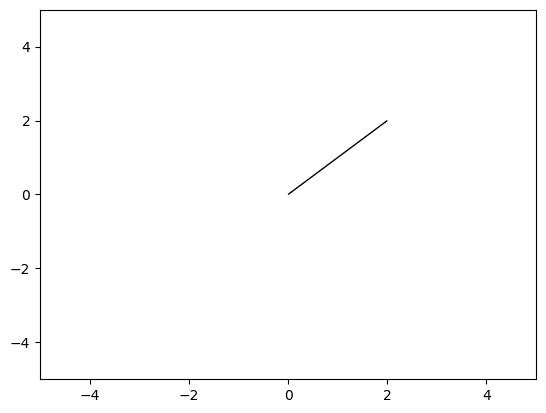

In [10]:
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches

verts = []
steps = []

# add starting point
verts.append((0.,0.))
steps.append(Path.MOVETO)

# add lines to a map
verts.append((2.,2.))
steps.append(Path.LINETO)

#GRAPH 
fig, ax = plt.subplots()
plt.axis([-5,5,-5,5])
path = Path(verts, steps)
patch = patches.PathPatch(path)
ax.add_patch(patch)
plt.show()

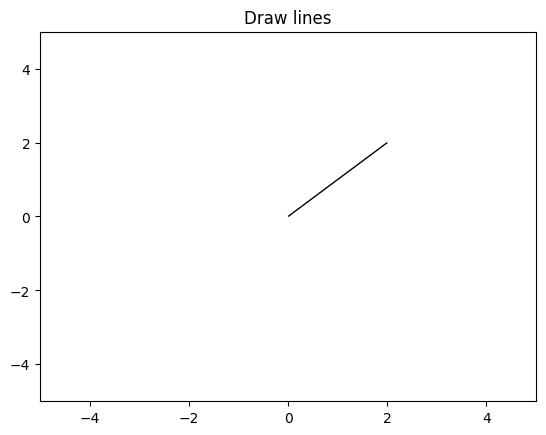

In [11]:
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches

verts = []
steps = []

# add starting point
verts.append((0.,0.))
steps.append(Path.MOVETO)

# add lines to a map
verts.append((2.,2.))
steps.append(Path.LINETO)

#GRAPH 
fig, ax = plt.subplots()
plt.axis([-5,5,-5,5])
path = Path(verts, steps)
patch = patches.PathPatch(path)
ax.add_patch(patch)
plt.title("Draw lines")
plt.show()